Streamlit Dashboard link: : https://appdashboard-nsxx9yzvzdfbixzugzyfp7.streamlit.app/

In [1]:
import pandas as pd
import streamlit as st
import altair as alt
from datetime import date

df = pd.read_csv('US_Regional_Sales_Data.csv')
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set the background color using a div
background_color = "#e6f7ff"  # light blue color
html_code = f"""
    <style>
        body {{
            background-color: {background_color};
        }}
    </style>
"""
st.markdown(html_code, unsafe_allow_html=True)

# Streamlit app
st.title('Sales Dashboard')

st.sidebar.header("Choose Filters: ")

date1 = pd.to_datetime(st.sidebar.date_input("Start Date", date(2018, 5, 31), min_value=date(2018, 5, 31), max_value=date(2020, 12, 20)))
date2 = pd.to_datetime(st.sidebar.date_input("End Date", date(2020, 12, 20), min_value=date(2018, 5, 31), max_value=date(2020, 12, 20)))

df = df[(df["OrderDate"] >= date1) & (df["OrderDate"] <= date2)].copy()

# Slicer for Warehouse Code with multi-select option (in the sidebar)
selected_warehouses = st.sidebar.multiselect('Select Warehouse Codes', df['WarehouseCode'].unique())

# Slicer for Sales Channel with multi-select option (in the sidebar)
selected_sales_channels = st.sidebar.multiselect('Select Sales Channels', df['SalesChannel'].unique())

# Check if filters are empty, and use the original DataFrame if they are
if not selected_warehouses and not selected_sales_channels:
    filtered_df = df.copy()
else:
    # Filter data based on selected slicer values
    filtered_df = df[(df['WarehouseCode'].isin(selected_warehouses)) &
                     (df['SalesChannel'].isin(selected_sales_channels))]

# Query 1: Warehouse Code vs. Number of Orders (Bar Graph)
st.subheader('Warehouse Code vs. Number of Orders')
warehouse_order_counts = filtered_df['WarehouseCode'].value_counts()
st.bar_chart(warehouse_order_counts)
st.text('Warehouse Code vs. Number of Orders')

# Query 2: Order Date vs. Number of Orders (Bar Graph)
st.subheader('Order Date vs. Number of Orders')
order_date_counts = filtered_df['OrderDate'].value_counts()
st.bar_chart(order_date_counts)
st.text('Order Date vs. Number of Orders')

# Query 3: Sales Channel vs. Number of Orders (Pie Chart)
st.subheader('Sales Channel vs. Number of Orders')
if 'SalesChannel' in filtered_df.columns:
    sales_channel_counts = filtered_df['SalesChannel'].value_counts().reset_index()
    sales_channel_counts.columns = ['index', 'SalesChannel']
    st.altair_chart(alt.Chart(sales_channel_counts).mark_bar().encode(
        x=alt.X('index:O', title='Sales Channel', axis=alt.Axis(labelAngle=45)),
        y=alt.Y('SalesChannel', title='Number of Orders'),
        tooltip=['index', 'SalesChannel']
    ), use_container_width=True)

# Query 4: Warehouse Code vs. Average Order Quantity (Bar Graph)
st.subheader('Warehouse Code vs. Average Order Quantity')
warehouse_avg_quantity = filtered_df.groupby('WarehouseCode')['OrderQuantity'].mean()
st.bar_chart(warehouse_avg_quantity)
st.text('Warehouse Code vs. Average Order Quantity')

# Query 5: Order Date vs. Average Order Quantity (Scatter Graph)
st.subheader('Order Date vs. Average Order Quantity')
scatter_chart = alt.Chart(filtered_df).mark_circle().encode(
    x=alt.X('OrderDate', title='Order Date'),
    y=alt.Y('mean(OrderQuantity)', title='Average Order Quantity'),
    tooltip=['OrderDate', 'mean(OrderQuantity)']
).interactive()
st.altair_chart(scatter_chart, use_container_width=True)

# Query 6: Sales Channel vs. Average Order Quantity (Bubble Chart)
st.subheader('Sales Channel vs. Average Order Quantity')
if 'SalesChannel' in filtered_df.columns:
    bubble_chart = alt.Chart(filtered_df).mark_circle().encode(
        x='SalesChannel',
        y=alt.Y('mean(OrderQuantity)', title='Average Order Quantity'),
        size='count()',
        tooltip=['SalesChannel', 'mean(OrderQuantity)', 'count()']
    ).interactive()
    st.altair_chart(bubble_chart, use_container_width=True)
else:
    st.warning("SalesChannel data not available for the selected warehouse.")

C:\Users\USER2023\AppData\Local\Temp\ipykernel_111264\2615271234.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])
2024-01-15 17:32:07.089 
  command:

    streamlit run C:\Users\USER2023\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## **Objective:**

The primary objective of this report is to provide comprehensive insights into various aspects of the sales and order fulfillment processes within the organization. By analyzing key metrics and relationships, the report aims to achieve the following:

1. **Warehouse Performance Analysis:** Understand the contribution of each warehouse to the overall order processing volume, enabling the identification of potential bottlenecks or areas for improvement.

2. **Order Date Distribution:** Gain insights into the temporal patterns of order placement, helping businesses optimize their operational resources and customer engagement strategies based on demand fluctuations.

3. **Sales Channel Contribution:** Evaluate the effectiveness of different sales channels in driving order generation, enabling businesses to allocate marketing and sales efforts more efficiently.

4. **Warehouse-Level Order Quantity Evaluation:** Identify variations in average order quantity handled by different warehouses, facilitating targeted strategies to enhance operational efficiency and resource allocation.

5. **Order Date and Order Quantity Correlation:** Explore the relationship between order date and average order quantity, potentially revealing patterns or trends that can inform production, inventory management, and customer service strategies.

6. **Sales Channel and Order Quantity Visualization:** Provide a visual representation of the average order quantity across sales channels, allowing businesses to identify potential correlations between channel type and order size, thus optimizing product offerings and marketing strategies accordingly.

Overall, this report aims to empower businesses with data-driven insights to make informed decisions, optimize operations, and enhance customer satisfaction.

## Data Overview

**OrderNumber:** Unique identifier for each order.

**SalesChannel:** The channel through which the order was placed, such as online, phone, or in-store.

**WarehouseCode:** The code of the warehouse from which the products were shipped.

**ProcuredDate:** The date on which the products were procured for the order.

**OrderDate:** The date on which the order was placed.

**ShipDate:** The date on which the order was shipped from the warehouse.

**DeliveryDate:** The date on which the order was delivered to the customer.

**CurrencyCode:** The currency code used for the order.

**_SalesTeamID:** The unique identifier of the sales team responsible for the order.

**_CustomerID:** The unique identifier of the customer who placed the order.

**_StoreID:** The unique identifier of the store where the order was placed (if applicable).

**_ProductID:** The unique identifier of the product ordered.

**OrderQuantity:** The quantity of the product ordered.

**DiscountApplied:** The discount applied to the unit price of the product.

**UnitCost:** The cost of the product per unit.

**UnitPrice:** The price of the product per unit, including any discounts applied.

**Data Overview:**

* The data contains information about orders, products, and customers.
* There are **10 numerical columns** and **7 categorical columns**.
* The data is likely stored in a relational database, with each table representing a different entity (e.g., orders, products, customers).
* The data can be used to generate reports on sales, inventory, and customer behavior.
* The data can also be used to analyze trends and patterns in sales data.

# ANALYSIS

 
 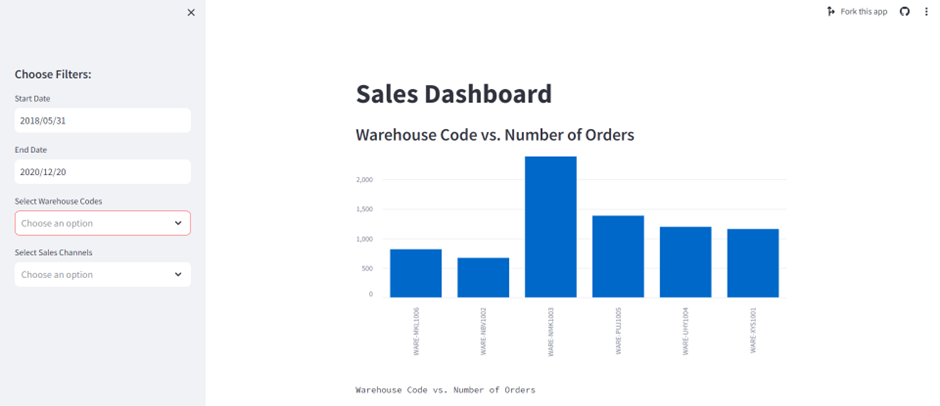
 
**Inference:**  The bar graph depicting the Warehouse Code vs. Number of Orders reveals that Warehouse NMK1003 has processed the highest number of orders among all warehouses. This suggests that NMK1003 is the most active warehouse in terms of order fulfillment. and is efficient in handling a substantial volume of orders.

**Managerial Implications:**

- Performance Benchmark: NMK1003 can serve as a benchmark for other warehouses, encouraging them to enhance their order processing capabilities and efficiency.

- By leveraging this insight, warehouse managers can make informed decisions to optimize operations, improve overall efficiency, and ensure customer satisfaction across the distribution network.



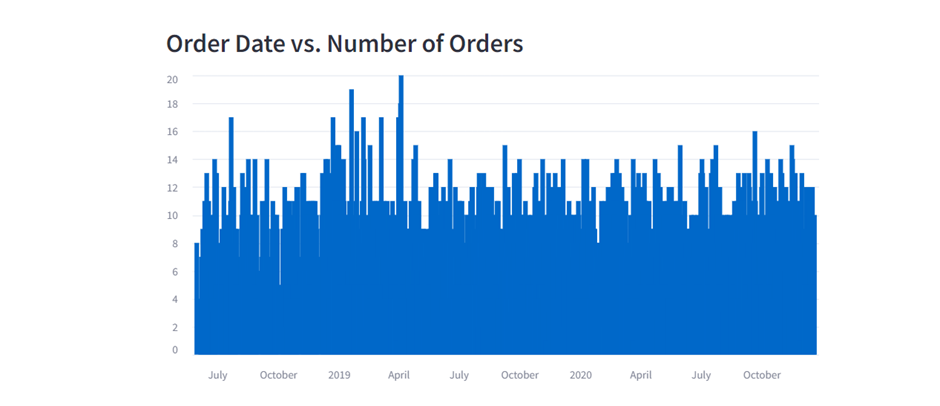

**Inference:** The bar graph illustrating Order Date vs. Number of Orders highlights a distinct pattern in the distribution of orders over time. Notably, April 5, 2019, stands out as the date with the highest number of orders, while May 14, 2019, records the lowest number of orders. By optimizing inventory management, and strategically align resources with fluctuating demand patterns throughout the analyzed period.

**Managerial Implications:**

- Peak Demand Understanding: Recognizing April 5, 2019, as a day with the highest order count is crucial for inventory planning. Managers should ensure that sufficient stock is available to meet increased demand during such peak periods.

- Operational Planning: Considering the lowest number of orders on May 14, 2019, managers can optimize operational efficiency on this date. This might involve adjusting staffing levels, minimizing warehouse activity, or focusing on other tasks to streamline operations.

- Marketing Strategies: Analysing factors contributing to the peak on April 5, 2019, can provide insights into effective marketing or promotional strategies. Replicating successful approaches can be beneficial for boosting sales during similar periods.


 
 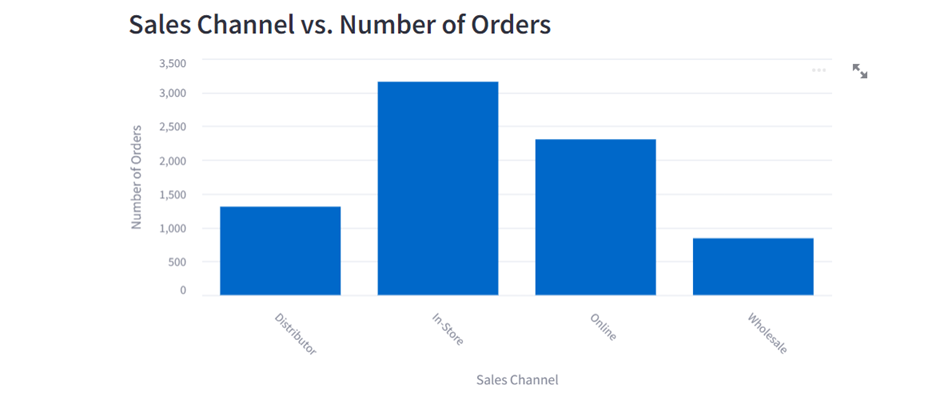
 
**Inference:** The pie chart representing Sales Channel vs. Number of Orders provides a clear overview of the distribution of orders across different channels. Notably, in-store sales emerge as the dominant channel, contributing the highest number of orders and claiming the largest share as compared to wholesale channel with least sales.

**Managerial Implications:**

- In-Store Success Acknowledgment: Recognizing in-store sales as the leading contributor to order volume is crucial. Managers should acknowledge the success of this channel and possibly explore strategies to maintain or further enhance its performance.
- Resource Allocation: Given the dominance of in-store sales, managers may consider allocating additional resources, such as staff training, marketing initiatives, or enhanced in-store experiences, to further capitalize on the success of this channel.

 
 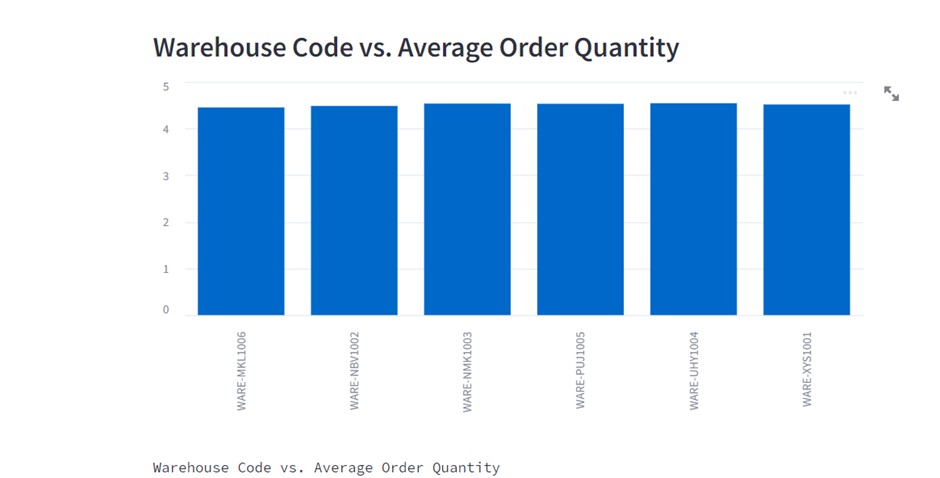
 
**Inference:**  The bar graph depicting Warehouse Code vs. Average Order Quantity suggests a consistent and similar average order quantity across all warehouses, approximately equal to 4.5. This implies a uniform distribution of order quantities among the different warehouses, with minimal variation in their average order processing capacity.

**Managerial implication:**

- Technology Integration: With a consistent average order quantity, managers can explore integrating technology solutions such as automation, robotics, or advanced order processing systems to further enhance operational efficiency and reduce manual labor.
- Forecasting Accuracy: The similarity in average order quantity aids in more accurate demand forecasting. Warehouse managers can leverage this information to optimize inventory levels, procurement processes, and overall supply chain management.


 
 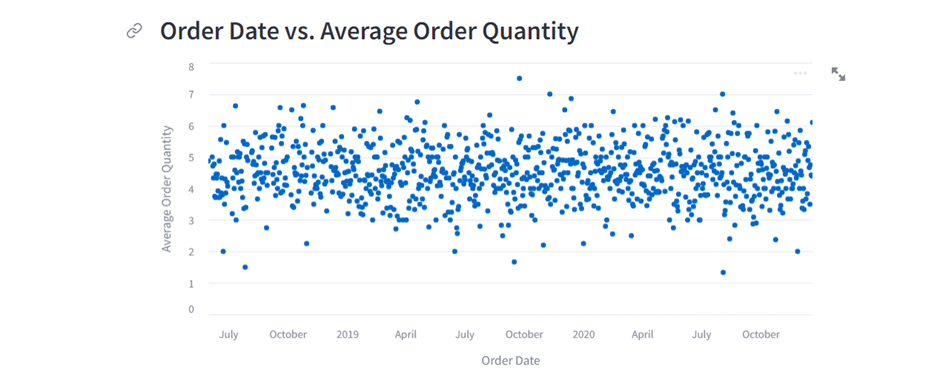
 
**Inference:** The scatter graph depicting Order Date vs. Average Order Quantity reveals that, despite the similarity in average order quantity across all months, there is a noticeable spike in orders or sales during the month of October. This suggests that while the average order quantity remains consistent, October experiences a significant increase in overall sales volume.

**Managerial Implications:**

- Supply Chain Optimization: Recognizing the spike in October, managers can optimize the supply chain to handle the increased demand efficiently. This involves streamlining procurement processes, improving order fulfillment workflows, and ensuring smooth logistics to accommodate the higher sales volume.

- Data-Driven Decision-Making: The analysis highlights the importance of data-driven decision-making. By continuously monitoring and analyzing the relationship between order date and average order quantity, managers can make informed decisions to adapt strategies based on changing market dynamics.


 
 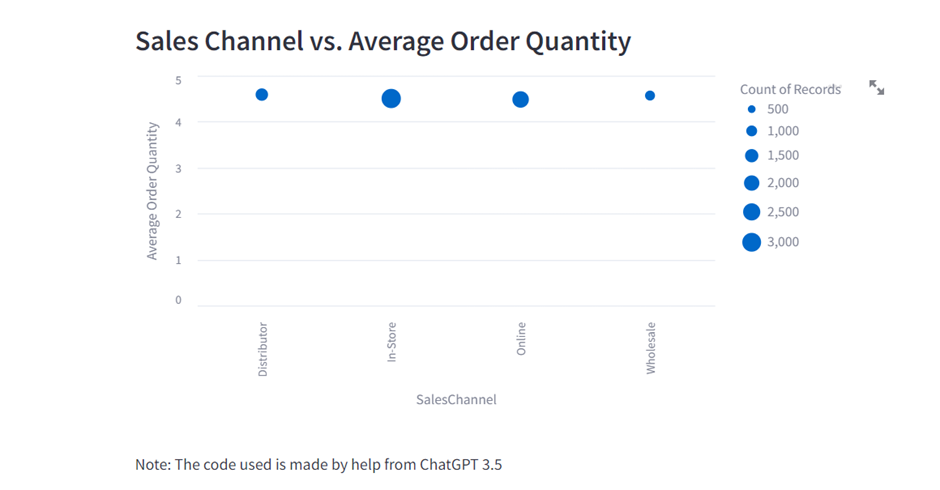
 
**Inference:** The bubble chart depicting Sales Channel vs. Average Order Quantity reveals that the in-store sales channel has the highest average order quantity, as indicated by the largest bubble. Following in-store sales, the online channel experiences a significant order quantity, albeit slightly smaller than the in-store channel.

**Managerial Implications:**

- In-Store Channel Strength: The dominance of the in-store channel in terms of both average order quantity and total number of orders suggests a strong preference or effectiveness in driving sales through physical locations. Managers should acknowledge and capitalize on the strengths of the in-store channel, potentially investing in enhancing the in-store shopping experience, training staff, or optimizing inventory management.

- Multi-Channel Strategy: Recognizing the strengths of both in-store and online channels, managers may consider implementing a multi-channel strategy. This approach aims to leverage the unique advantages of each channel, offering customers a seamless and integrated shopping experience, potentially boosting overall sales.

- Customer Engagement: Understanding the success of in-store and online channels allows for targeted customer engagement strategies. Managers can tailor marketing efforts, loyalty programs, and promotions to the preferences and behaviors of customers in each channel, enhancing overall customer satisfaction and loyalty.

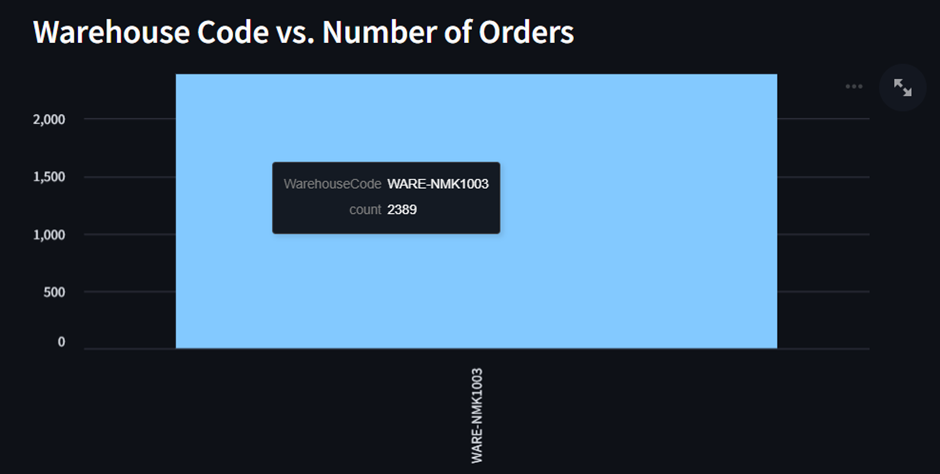
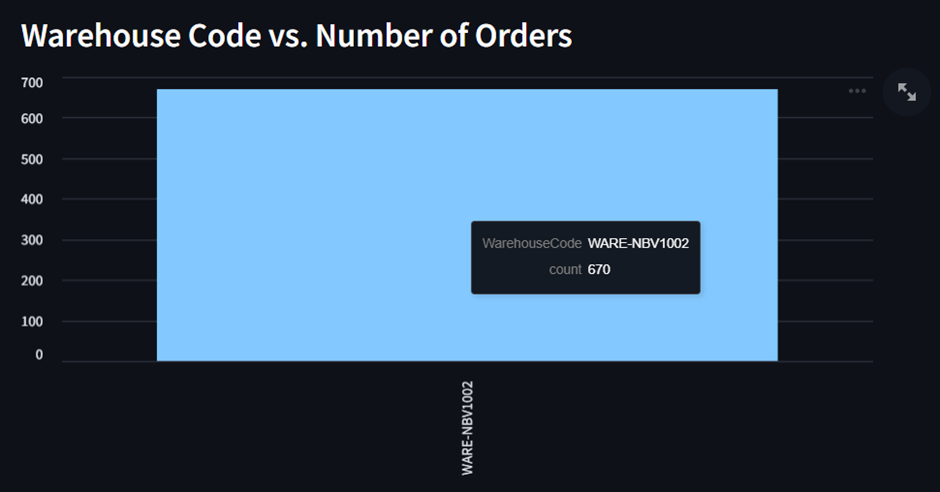

### Inference:

1. **Most Profitable Warehouse (WARE-NMK1003):**
   - This warehouse has the highest number of orders (2389) compared to others.
   - The sales team assigned to this warehouse seems to be performing well in terms of order generation.
   - The products stored in this warehouse or the pricing strategy might be particularly attractive to customers.

2. **Least Profitable Warehouse (WARE-NBV1002):**
   - This warehouse has the lowest number of orders (670) among the six warehouses.
   - Possible reasons could include poor sales team performance, less attractive product offerings, or inefficient marketing strategies.
   - Managerial attention may be needed to investigate and improve performance in this warehouse.

3. **Differences in Warehouse Performances:**
   - There are notable variations in the number of orders among the warehouses, indicating that some warehouses are more successful than others.
   - It's important to understand the factors contributing to these differences to replicate success or address challenges.

### Managerial Implications:

1. **Optimization Opportunities:**
   - Identify and analyze the key factors contributing to the success of WARE-NMK1003. Implement similar strategies in other warehouses to optimize their performance.
   - Conduct a detailed analysis of WARE-NBV1002 to identify the root causes of lower performance. Implement corrective measures to improve results.

2. **Sales Team Evaluation:**
   - Evaluate the sales teams associated with each warehouse. If WARE-NMK1003 is performing exceptionally well, consider sharing successful practices with other teams.
   - Provide additional training or support to teams associated with underperforming warehouses.

3. **Product and Pricing Strategy:**
   - Evaluate the product mix and pricing strategy for WARE-NMK1003. Determine if the success is attributed to specific products or competitive pricing.
   - Adjust product offerings or pricing strategies in other warehouses to maximize sales.

4. **Operational Efficiency:**
   - Assess the operational efficiency of each warehouse. Ensure timely order processing, shipping, and delivery to enhance customer satisfaction.
   - Streamline operations in underperforming warehouses to reduce costs and improve overall efficiency.

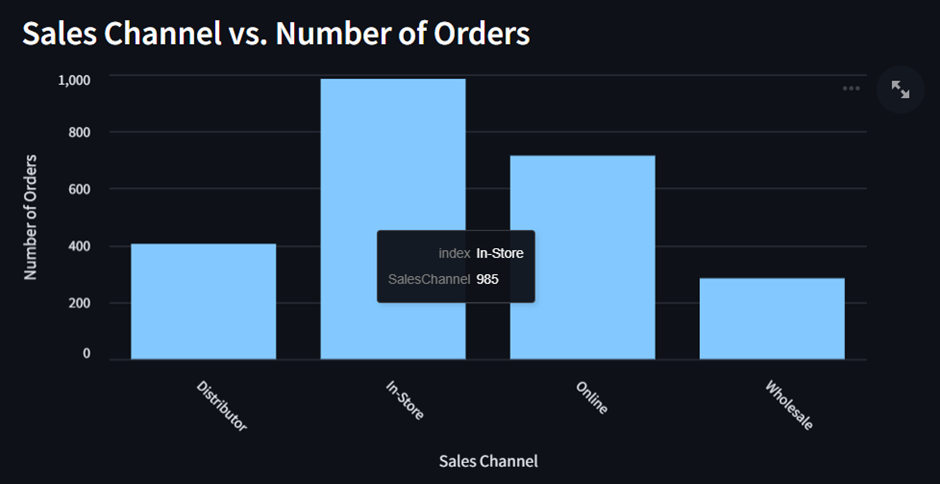
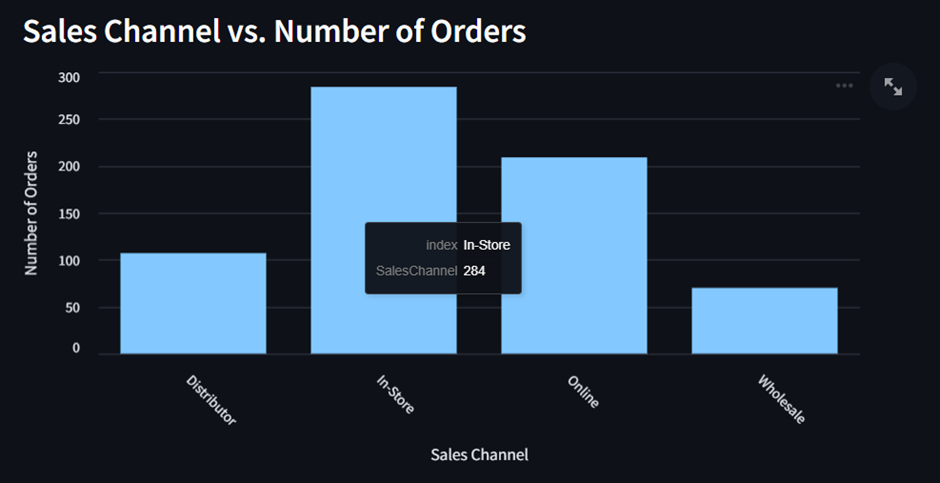

### Inferences:

1. **In-Store Channel Dominance:**
   - The in-store sales channel has received the highest number of orders across all 6 warehouses.
   - This suggests that customers prefer making purchases through physical stores, indicating the importance of brick-and-mortar presence in the sales strategy.

2. **Wholesale Channel Challenges:**
   - The wholesale channel has the least number of orders among all channels in all 6 warehouses.
   - There might be challenges or opportunities for improvement in the wholesale channel, such as attracting more wholesale clients, optimizing pricing strategies, or streamlining the wholesale ordering process.

3. **Daily Average Order Quantity:**
   - The in-store channel not only has the highest number of orders but also the highest daily average order quantity.
   - This implies that customers visiting physical stores tend to make larger purchases on average compared to other channels.

### Managerial Implications:

1. **In-Store Channel Enhancement:**
   - Reinforce the in-store sales strategy by investing in the enhancement of the in-store shopping experience.
   - Train and empower sales teams in physical stores to maximize customer satisfaction and encourage larger purchases.

2. **Wholesale Channel Optimization:**
   - Evaluate the challenges faced by the wholesale channel and identify areas for improvement.
   - Explore partnerships, promotions, or incentives to attract more wholesale clients and increase order quantities.

3. **Marketing and Promotion:**
   - Develop targeted marketing and promotional campaigns to drive sales in the wholesale channel.
   - Highlight the benefits and convenience of wholesale purchasing for potential clients.

4. **Inventory Management:**
   - Optimize inventory management strategies based on the characteristics of each sales channel.
   - Ensure that physical stores are well-stocked to meet the demand for higher daily average order quantities.